## Import Libraries and Excel File

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [111]:
df = pd.read_csv('processed.cleveland.data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Data Wrangling and Cleaning

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [113]:
#Renaming the coLumn name
df.rename(columns={'cp':'chest pain location','trestbps':'resting blood pressure','chol':'cholesterol',
                   'fbs':'fasting blood pressure','restecg':'resting electrocardiographic results',
                   'thalach':'maximum heart rate','exang':'exercise induced angina','ca':'major vessels','ca':'major vessels'
                    ,'num':'angiographic disease status'
                  }, inplace=True)
df.head()

,age,sex,chest pain location,resting blood pressure,cholesterol,fasting blood pressure,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope,major vessels,thal,angiographic disease status
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [114]:
#check for null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [115]:
#simple statistics to see if any outlier
df.describe()

,age,sex,chest pain location,resting blood pressure,cholesterol,fasting blood pressure,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope,angiographic disease status
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [135]:
#Data Aggregation and Grouping
cholesterol_df=df.groupby(df['angiographic disease status'])['cholesterol'].mean()
cholesterol_df=cholesterol_df.reset_index()
# filter by just the 2 columns cholesterol and angiographic disease status
filter_df = df[['angiographic disease status','cholesterol']]


,angiographic disease status,cholesterol
0,0,233
1,2,286
2,1,229
3,0,250
4,0,204
...,...,...
298,1,264
299,2,193
300,3,131
301,1,236


## Analysis and Graphs

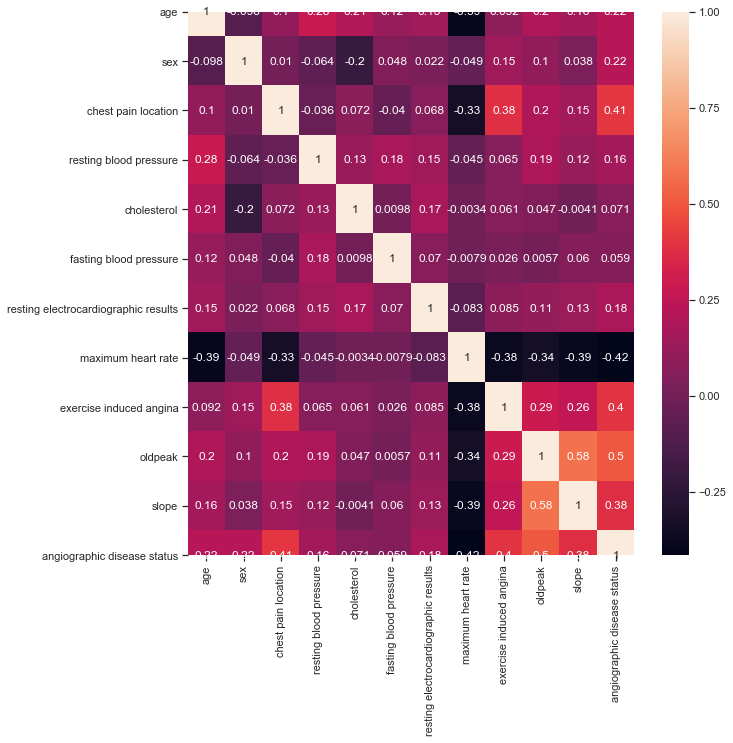

In [140]:
#create a heatmap to see if there is any correlation between heart disease and the rest of the columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

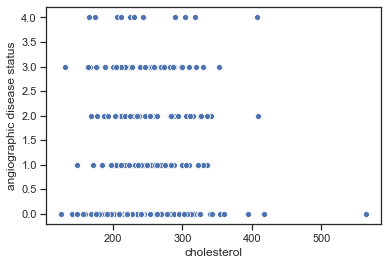

In [141]:
sns.scatterplot(x='cholesterol', y='angiographic disease status', data=filter_df)

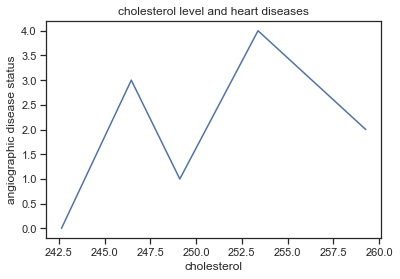

In [126]:
# creating the line graph to see if higher cholesterol will affect the heart disease status
plt.title('cholesterol level and heart diseases')
sns.lineplot(x=cholesterol_df['cholesterol'], y=cholesterol_df['angiographic disease status'])